In [9]:
eli_file=open("./sdrap_tet_10272020_pid95_add90/sdrap_tet_10272020_pid95_add90_prec_eliminated_sequences.bed","r")
mds_file=open("./sdrap_tet_10272020_pid95_add90/sdrap_tet_10272020_pid95_add90_prec_intervals.bed","r")
output=open("./sdrap_tet_10272020_pid95_add90/sdrap_tet_10272020_pid95_add90_ambiguous_prec_eliminated_sequences_annotation.txt","w")

eli_dic={}
for line in eli_file:
    if line[0]!="#":
        MIC=line.split("\t")[0]
        start=int(line.split("\t")[1])
        end=int(line.split("\t")[2])
        mds_info=line.split("\t")[3]
        if "none" not in mds_info: # not boundary
            if MIC not in eli_dic:
                eli_dic[MIC]=[[start,end]]
            else:
                eli_dic[MIC].append([start,end])


                
flank_dic={}
for line in mds_file:
    if line[0]!="#":
        MIC=line.split("\t")[0]
        start=int(line.split("\t")[1])
        end=int(line.split("\t")[2])
        mds_info=line.split("\t")[3]
        if MIC in eli_dic:
            for non_mds in eli_dic[MIC]:
                non_mds_s=non_mds[0]
                non_mds_e=non_mds[1]
                non_mds_id=MIC+"\t"+str(non_mds_s)+"\t"+str(non_mds_e)
                if start ==non_mds_e+1: #this is the mds on the right
                    right=mds_info.split("_")[2]+"_"+mds_info.split("_")[5]
                    if non_mds_id not in flank_dic:
                        flank_dic[non_mds_id]={0:[],1:[]} # left is 0, right is 1
                    flank_dic[non_mds_id][1].append(right)

                if end+1==non_mds_s: #this is the mds on the left:
                    left=mds_info.split("_")[2]+"_"+mds_info.split("_")[5]
                    if non_mds_id not in flank_dic:
                        flank_dic[non_mds_id]={0:[],1:[]} # left is 0, right is 1
                    flank_dic[non_mds_id][0].append(left)


feature_dic={}
for non_mds in flank_dic:
    if len(flank_dic[non_mds][0])>1 or len(flank_dic[non_mds][1])>1: #paralogours MDS
        for mds1 in flank_dic[non_mds][0]:
            mac1=mds1.split("_")[0]
            index1=int(mds1.split("_")[1])
            for mds2 in flank_dic[non_mds][1]:
                mac2=mds2.split("_")[0]
                index2=int(mds2.split("_")[1])
                if mac1==mac2:
                    if index2-index1==1: # the orientation is important. MDS2 has to be on the 3' of MDS1
                        feature="IES_nonscrambled"
                    elif index1==index2:
                        feature="IES_same"
                    elif index1+index2==0:
                        feature="IES_sameinverted"
                    else:
                        feature="IES_scrambled"

                else:
                    feature="Intergenic"

                if non_mds not in feature_dic:
                    feature_dic[non_mds]=[feature+":%s_%d_%s_%d" % (mac1,index1,mac2,index2)]
                else:
                    feature_dic[non_mds].append(feature+":%s_%d_%s_%d" % (mac1,index1,mac2,index2))


for non_mds in feature_dic:
    output.write(non_mds+"\t")
    for feature in feature_dic[non_mds]:
        output.write(feature+"|")
    output.write("\n")

eli_file.close()
mds_file.close()
output.close()





nonscrambled:28230_median:63_average:212
scrambled:1465_median:163_average:581


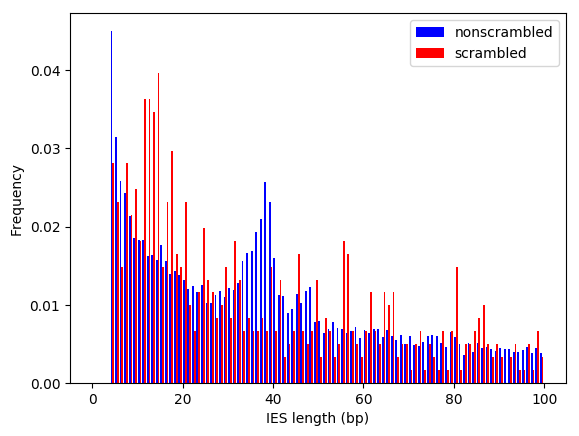

In [2]:
# import matplotlib.pyplot as plt
import statistics
import matplotlib.pyplot as plt

ambi=open("./sdrap_ewoo_11032020_pid95_add90/sdrap_ewoo_11032020_pid95_add90_ambiguous_prec_eliminated_sequences_annotation.txt","r")
f=open("./sdrap_ewoo_11032020_pid95_add90/sdrap_ewoo_11032020_pid95_add90_prec_eliminated_sequences.bed","r")
output=open("Feature_sdrap_ewoo_11032020_pid95_add90_prec_eliminated_sequences.bed","w")

    
ambi_dic={}
for line in ambi:
    mic=line.split("\t")[0]
    start=line.split("\t")[1]
    end=line.split("\t")[2]
    non_mds_id=mic+"\t"+start+"\t"+end
    feature=line.split("\t")[3][:-2] #remove | and \n
    ambi_dic[non_mds_id]=feature

    
IES_nonscrambled_ls=[]
IES_scrambled_ls=[]

for line in f:
    if line[0]!="#":
        mic=line.split("\t")[0]
        start=line.split("\t")[1]
        end=line.split("\t")[2]
        non_mds_id=mic+"\t"+start+"\t"+end
        if non_mds_id not in ambi_dic: #not ambiguous
            MAC_info=line.split("\t")[3]
            MAC1=MAC_info.split("_")[1]
            MAC2=MAC_info.split("_")[3]
            ies_l=int(end)-int(start)+1
            feature=""
            if MAC1 =="none" or MAC2=="none":
                feature="boundary"
            elif MAC1==MAC2:
                mds_1=int(MAC_info.split("_")[2])
                mds_2=int(MAC_info.split("_")[4])
                if mds_2-mds_1==1: #updated
                    feature="IES_nonscrambled"
                    IES_nonscrambled_ls.append(ies_l)
                elif mds_1-mds_2==0:
                    feature="IES_same"
                elif mds_1+mds_2==0:
                    feature="IES_sameinverted"
                else:
                    feature="IES_scrambled" 
                    IES_scrambled_ls.append(ies_l)
            else:
                feature="Intergenic"
            detail=MAC_info
        else:
            detail=ambi_dic[non_mds_id]
            f_ls=[]
            for feature in detail.split("|"):
                f_ls.append(feature.split(":")[0]) #append the feature to feature list
            f_ls=list(set(f_ls)) # remove redundancy
            if len(f_ls)==1:
                feature=f_ls[0]
            else:
                feature=f_ls
                
        output.write(non_mds_id+"\t"+str(feature)+"\t"+detail+"\n")

        
        
output.close()
ambi.close()
f.close()
            
plt.style.use('default')    
plt.hist([IES_nonscrambled_ls,IES_scrambled_ls],bins=100, density=True, range=(0,99.9),color=["blue","red"],label=["nonscrambled","scrambled"])
plt.legend(loc="best")
#plt.title("Tetmemena IES length distribution")
plt.ylabel("Frequency")
plt.xlabel("IES length (bp)")
plt.savefig('./Figure1/ewoo_IES_distribution_1025.pdf', format='pdf', bbox_inches='tight')
print ("nonscrambled:%d_median:%d_average:%d" % (len(IES_nonscrambled_ls),statistics.median(IES_nonscrambled_ls),sum(IES_nonscrambled_ls)/len(IES_nonscrambled_ls)))
print ("scrambled:%d_median:%d_average:%d" % (len(IES_scrambled_ls),statistics.median(IES_scrambled_ls),sum(IES_scrambled_ls)/len(IES_scrambled_ls)))
plt.show()  